In [44]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [45]:
#Definimos las variables
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)
t,g, L1, the1

(t, g, L1, \theta_1)

In [46]:
#Definimos los ángulos, se debe de argumentar que estas dependen del tiempo, por lo que se expica que los angulos tienen dependencia del tiempo
the1 = the1(t)
the2 = the2(t)


In [47]:
the1  

\theta_1(t)

In [48]:
#En este punto se están derivando los ángulos
the_d1=smp.diff(the1,t)
the_d2=smp.diff(the2,t)


In [49]:
#segunda derivada o aceleración
the_dd1=smp.diff(the_d1,t)
the_dd2=smp.diff(the_d2,t)
the_dd2

Derivative(\theta_2(t), (t, 2))

In [50]:
#Ecucación para el primer eslavon
x1=L1*smp.cos(the1)
y1=L1*smp.sin(the1)

In [51]:
#Ecuación para el segundo
x2=L1*smp.cos(the1)+L2*smp.cos(the1+the2)
y2=L1*smp.sin(the1)+L2*smp.sin(the1+the2)
x2

L1*cos(\theta_1(t)) + L2*cos(\theta_1(t) + \theta_2(t))

In [52]:
x1_d=smp.diff(x1,t)
y1_d=smp.diff(y1,t)
x2_d=smp.diff(x2,t)
y2_d=smp.diff(y2,t)

In [53]:
#Energía cinética para cada eslavón
K1=1/2*m1*((x1_d)**2+(y1_d)**2)
K2=1/2*m2*((x2_d)**2+(y2_d)**2)
KT=K1+K2
KT

0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((-L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t)))**2)

In [54]:
#Energía potencial para cada eslavón
V1=g*m1*y1
V2=g*m2*y2
VT=V1+V2
VT


L1*g*m1*sin(\theta_1(t)) + g*m2*(L1*sin(\theta_1(t)) + L2*sin(\theta_1(t) + \theta_2(t)))

Para simplificar el trabajo se puede proponer un lagranggiano, es decir que solo se haga una suma total de las potencias y cinéticas, de todas maneras se debe de derivar 

In [55]:
#Definiendo el lagrangiano
L=KT-VT
L

-L1*g*m1*sin(\theta_1(t)) - g*m2*(L1*sin(\theta_1(t)) + L2*sin(\theta_1(t) + \theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((-L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t)))**2)

In [56]:
LE1 = -smp.diff(L, the1) + smp.diff(smp.diff(L, the_d1), t).simplify()
LE2 = -smp.diff(L, the2) + smp.diff(smp.diff(L, the_d2), t).simplify()
LE1

L1**2*m1*Derivative(\theta_1(t), (t, 2)) + L1*g*m1*cos(\theta_1(t)) + g*m2*(L1*cos(\theta_1(t)) + L2*cos(\theta_1(t) + \theta_2(t))) - 0.5*m2*((-2*L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - 2*L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t))) + (-L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))*(-2*L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - 2*L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t)))) + m2*(L1**2*Derivative(\theta_1(t), (t, 2)) - 2*L1*L2*sin(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) - L1*L2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + 2*L1*L2*cos(\theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L1*L2*cos(\theta_2(t))*Derivat

In [57]:
LE2

L2*g*m2*cos(\theta_1(t) + \theta_2(t)) + 1.0*L2*m2*(-L1*sin(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*cos(\theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_2(t), (t, 2))) - 0.5*m2*(-2*L2*(-L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t)) - 2*L2*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*cos(\theta_1(t) + \theta_2(t)))*(Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t))*sin(\theta_1(t) + \theta_2(t)))

In [58]:


sols = smp.solve([LE1, LE2], (the_dd1, the_dd2),
                simplify=False, rational=False)



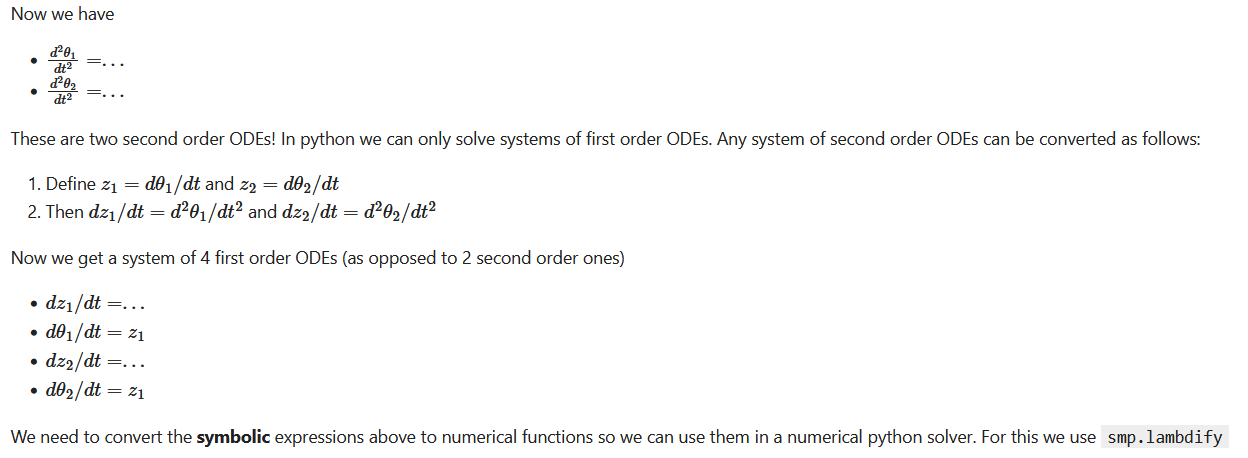

In [59]:
sols[the_dd1]

1.0*L1*m2*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) + 1.0*L1*m2*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) - 1.0*L1*m2*sin(\theta_1(t))*cos(\theta_1(t) + \theta_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) - 1.0*L1*m2*sin(\theta_1(t))*cos(\theta_1(t) + \theta_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) - 1.0*L1*m2*sin(\theta_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) + 1.0*L2*m2*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_2(t))**2 + 1.0*L1*m2) 

In [60]:
sols[the_dd2]

-1.0*L1**2*m1*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) - 1.0*L1**2*m1*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) + 1.0*L1**2*m1*sin(\theta_1(t))*cos(\theta_1(t) + \theta_2(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) + 1.0*L1**2*m1*sin(\theta_1(t))*cos(\theta_1(t) + \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) + 1.0*L1**2*m1*sin(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) - 1.0*L1**2*m2*sin(\theta_1(t) + \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*L2*m1 - 1.0*L1*L2*m2*cos(\theta_2(t))**2 + 1.0*L1*L2*m2) - 1.0*L1**2*

In [61]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the_d1,the_d2), sols[the_dd1])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the_d1,the_d2), sols[the_dd2])
dthe1dt_f = smp.lambdify(the_d1, the_d1)
dthe2dt_f = smp.lambdify(the_d2, the_d2)

In [62]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

In [63]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=3
m2=5
L1 =1
L2 = 2
ans = odeint(dSdt, y0=[1, -1, -1, 2], t=t, args=(g,m1,m2,L1,L2))

In [64]:
ans.T

array([[ 1.        ,  0.95677435,  0.90709163, ..., -6.65260795,
        -6.97318122, -7.25289549],
       [-1.        , -1.16096134, -1.32431017, ..., -8.42423657,
        -7.47672747, -6.58478375],
       [-1.        , -0.91942341, -0.83741695, ..., 37.81052322,
        38.22461301, 38.55108754],
       [ 2.        ,  2.03009409,  2.07341387, ..., 11.21886197,
         9.23982922,  7.18919389]])

In [65]:
the1 = ans.T[0]
the2 = ans.T[2]

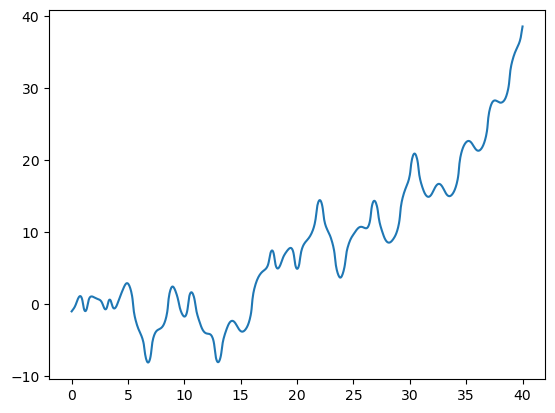

In [66]:
plt.plot(t, the2)

Es momento de animar la solución del sistema, aquí se están obteniendo las soluciones o valores para cada punto de la ecuación según fueron los valores de theta dados. Si se observa bien, el "return" son las ecuaciones que describen x1,y1,x2,y2

In [67]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the1+the2),
            -L1*np.cos(the1) - L2*np.cos(the1+the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

Aqui abajo se está animando según la información generada

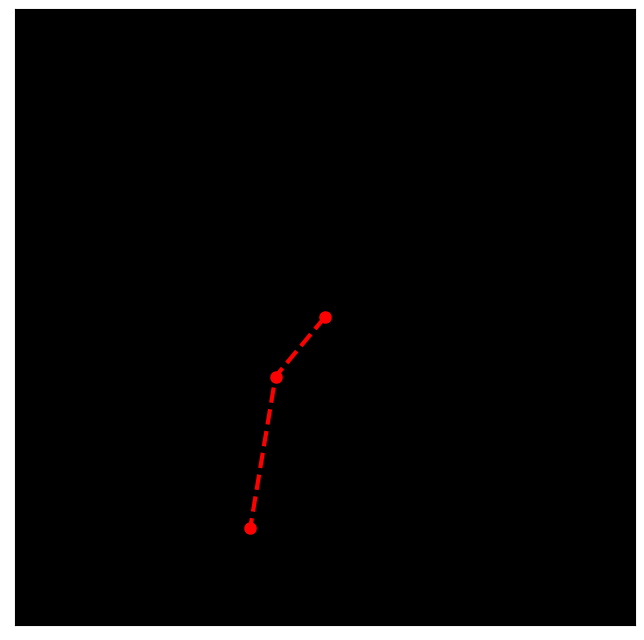

In [68]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
#Aquí se diseñan los brazos
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
#mi ruta de guardado para el archivo
f = r"c://Users/jatar/Desktop/Solucion.gif" 
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save(f,writer='pillow',fps=25)